# Clustering Analysis and finding different types of users
Using the following code, we will get the four categories of users considering their spatial regularity. In other words, we looked at the distribution of their most common destination. Using the K-means clustering we acheived four categories of users, which we refered them as most regular, regular, irregular, and most irregular users.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('C:/Users/arsalan/Desktop/Ridership flow/ind_mostcom_Destination_23_df.csv' , index_col= 'NAME')


In [3]:
df

,MotsCom_Destination,Count
NAME,,
1,512,4
2,359,14
4,721,4
5,304,19
6,301,14
...,...,...
3571526,301,1
3572033,2826,1
3574267,359,1


In [46]:
df.describe()

,MotsCom_Destination,Count
count,257309.000000,257309.000000
mean,738.269633,4.165140
std,672.904235,4.805898
min,2.000000,1.000000
25%,304.000000,1.000000
50%,521.000000,2.000000
75%,666.000000,5.000000
max,3436.000000,93.000000


In [4]:
scaler = StandardScaler()

In [5]:
df[['Count_T']] = scaler.fit_transform(df[['Count']])

In [6]:
df

,MotsCom_Destination,Count,Count_T
NAME,,,
1,512,4,-0.034362
2,359,14,2.046419
4,721,4,-0.034362
5,304,19,3.086809
6,301,14,2.046419
...,...,...,...
3571526,301,1,-0.658596
3572033,2826,1,-0.658596
3574267,359,1,-0.658596


In [7]:
# Create function to work out optimum number of clusters
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    #Generate the elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show
  

c:\Users\arsalan\.conda\envs\cet581\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\arsalan\.conda\envs\cet581\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\arsalan\.conda\envs\cet581\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\arsalan\.conda\envs\cet581\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

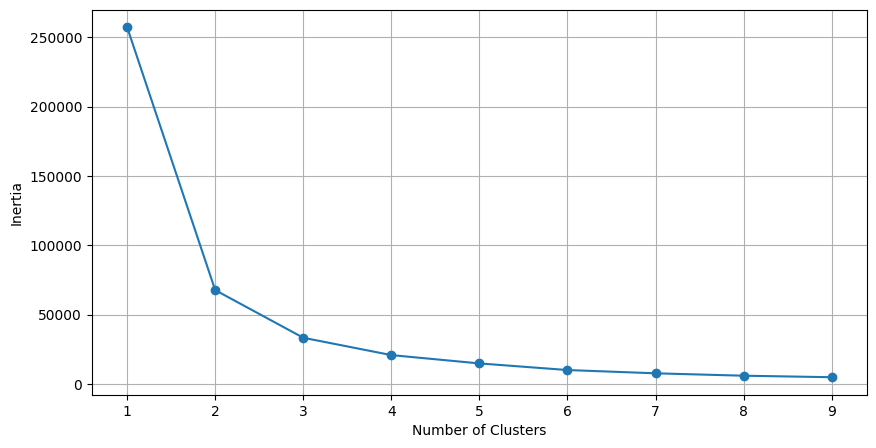

In [8]:
optimise_k_means(df[['Count_T']], 10)


In [9]:
kmeans = KMeans(n_clusters = 4)

In [10]:
kmeans.fit(df[['Count_T']])

c:\Users\arsalan\.conda\envs\cet581\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [11]:
df['kmeans_4']= kmeans.labels_

In [12]:
df

,MotsCom_Destination,Count,Count_T,kmeans_4
NAME,,,,
1,512,4,-0.034362,2
2,359,14,2.046419,1
4,721,4,-0.034362,2
5,304,19,3.086809,3
6,301,14,2.046419,1
...,...,...,...,...
3571526,301,1,-0.658596,0
3572033,2826,1,-0.658596,0
3574267,359,1,-0.658596,0


In [67]:
df.to_csv('C:/Users/arsalan/Desktop/Ridership flow/data.csv', index=True)

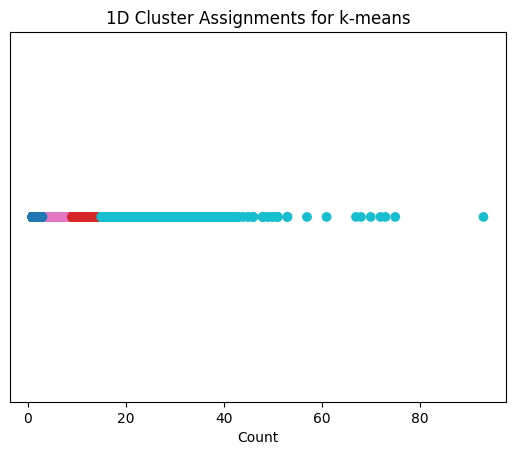

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df has 'Count' and 'kmeans_4' columns
# You may need to replace 'kmeans_4' with the actual column name in your DataFrame
data_column = df['Count']
cluster_assignments = df['kmeans_4']

# Plot the results in a 1D scatter plot with colors based on clusters
plt.scatter(data_column, [1]*len(data_column), c=cluster_assignments, cmap='tab10', marker='o')
plt.yticks([])  # Hide the y-axis
plt.xlabel('Count')
plt.title('1D Cluster Assignments for k-means')
plt.show()

In [69]:
unique_labels = df['kmeans_4'].unique()
print(unique_labels)

[3 1 2 0]


In [70]:
kmeans.cluster_centers_

array([[-0.56395263],
       [ 1.45608759],
       [ 2.92874346],
       [ 0.30368674]])

In [65]:
df

,MotsCom_Destination,Count,Count_T,kmeans_4
NAME,,,,
1,512,4,-0.034362,3
2,359,14,2.046419,1
4,721,4,-0.034362,3
5,304,19,3.086809,2
6,301,14,2.046419,1
...,...,...,...,...
3571526,301,1,-0.658596,0
3572033,2826,1,-0.658596,0
3574267,359,1,-0.658596,0


In [71]:
kmeans.cluster_centers_

array([[-0.56395263],
       [ 1.45608759],
       [ 2.92874346],
       [ 0.30368674]])

In [24]:
means_by_cluster = df.groupby('kmeans_4')['Count'].mean()

In [72]:
print(means_by_cluster)

kmeans_4
0     5.624625
1     1.454846
2    18.240356
3    11.162935
Name: Count, dtype: float64


In [33]:
df['kmeans_4'].value_counts()

kmeans_4
1    168336
0     48293
3     26397
2     14283
Name: count, dtype: int64

In [34]:
df.shape

(257309, 4)